# Predicting Insurance Claim Amounts

## Objective:   
Estimate the medical insurance claim amount based on personal data

## Importing Necessory Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for continuous variable
from sklearn.metrics import (precision_score, recall_score, confusion_matrix, classification_report, roc_curve,
                            precision_recall_curve) # for classification


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('4. Data\insurance.csv')

In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**There are no null values and Data Type of each column is also correct.**

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


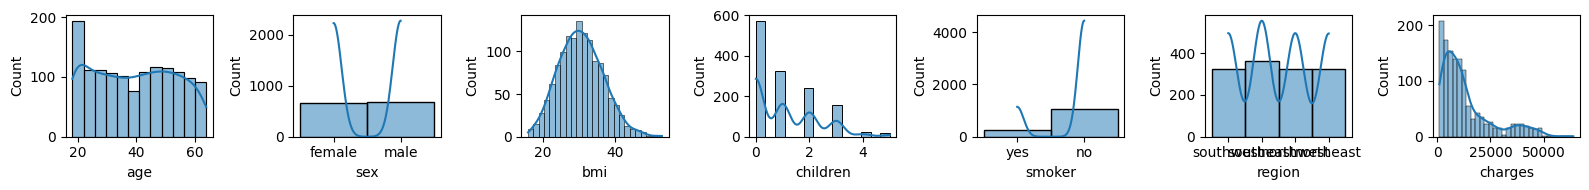

In [8]:
plt.figure(figsize=(16,2))

total_col = len(df.columns)

for idx, col in enumerate(df.columns):
    plt.subplot(1, total_col, idx+1)
    sns.histplot(df[col], kde=True)
    plt.tight_layout()

plt.show()

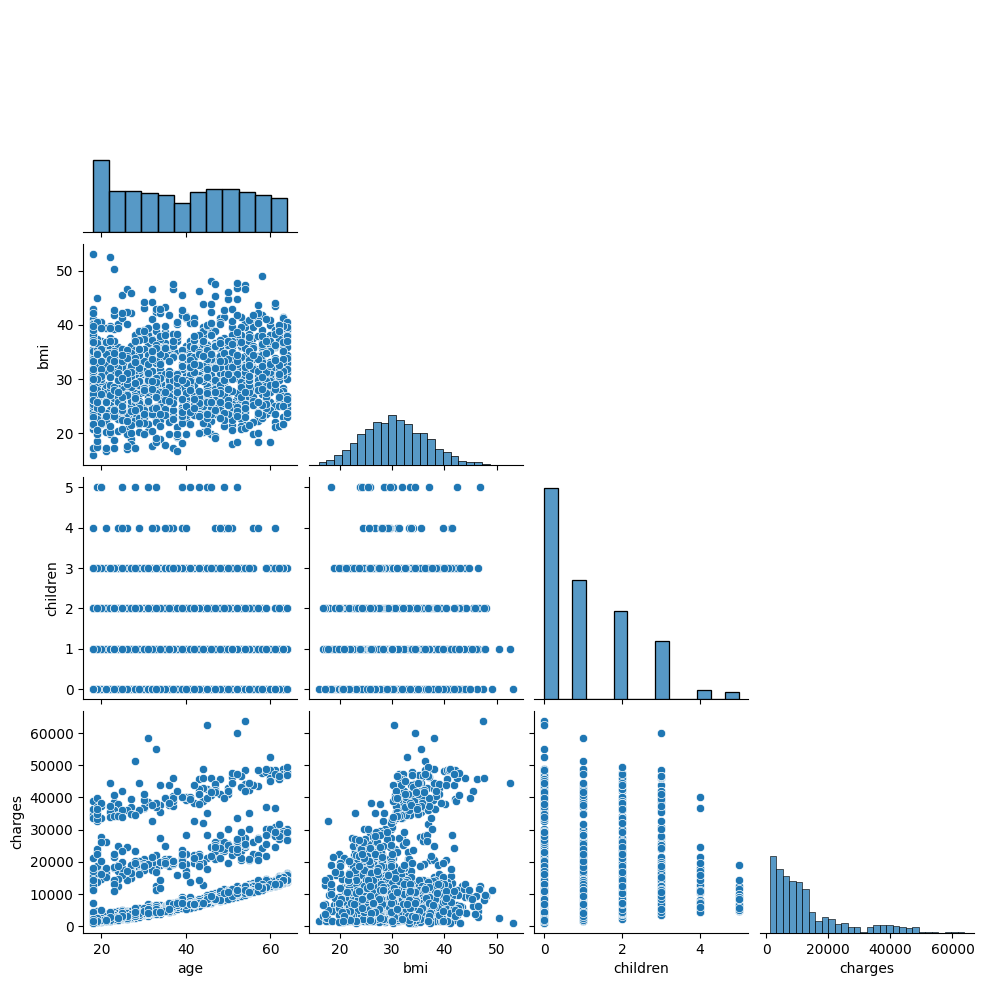

In [9]:
sns.pairplot(df, corner=True)
plt.show()

## Data Preprocessing:

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
X = df.drop(columns=['charges'])
y = df['charges']

In [13]:
X_cat = [col for col in X.columns if X[col].dtype == 'object'] # Categorical column name list
X_num = [col for col in X.columns if X[col].dtype != 'object'] # Numerical column name list

In [14]:
X[X_cat] = OrdinalEncoder().fit_transform(X[X_cat]) # encoding the categorical Data

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 62.8 KB


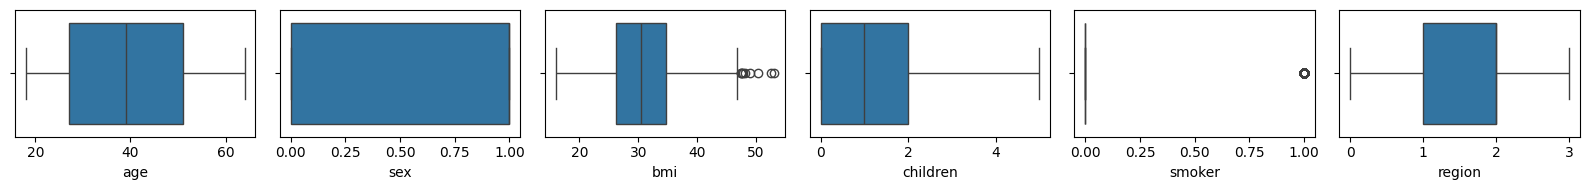

In [16]:
plt.figure(figsize=(16,2))

total_col = len(X.columns)

for idx, col in enumerate(X.columns):
    plt.subplot(1, total_col, idx+1)
    sns.boxplot(x=X[col])
    plt.tight_layout()

plt.show()

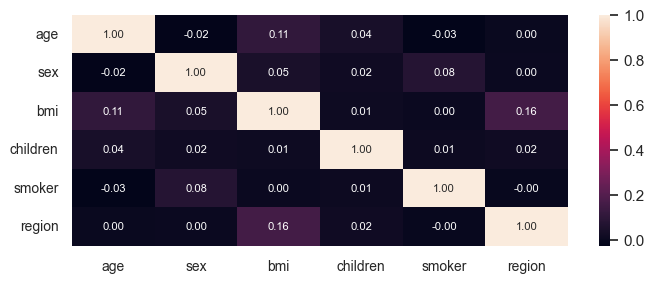

In [350]:
# Correlation with heat map
corr_overall = X.corr()

plt.figure(figsize=(8,3))

a = sns.heatmap(corr_overall, annot=True, annot_kws={"size": 8}, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), fontsize=10)
roty = a.set_yticklabels(a.get_yticklabels(), fontsize=10)

# Machine Learning Models:

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1. Linear Regression

In [354]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

y_pred_LR = LR_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_LR)
mae = mean_absolute_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)

print('Linear Regression Model Performance')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Model Performance
Mean Squared Error (MSE): 35003518.46
Mean Absolute Error (MAE): 4084.55
R² Score: 0.74


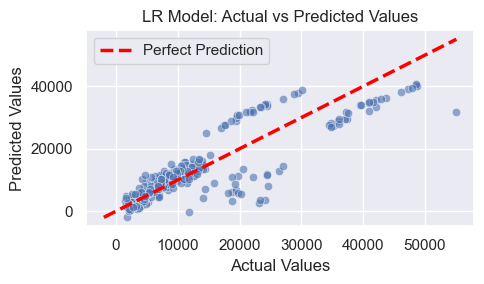

In [355]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred_LR, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_pred_LR))
min_val = min(min(y_test), min(y_pred_LR))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("LR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. Decision Tree Regressor Model

In [357]:
DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train, y_train)

y_pred_DTR = DTR_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_DTR)
mae = mean_absolute_error(y_test, y_pred_DTR)
r2 = r2_score(y_test, y_pred_DTR)

print('Decision Tree Regressor Model Performance')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Decision Tree Regressor Model Performance
Mean Squared Error (MSE): 49657530.13
Mean Absolute Error (MAE): 3475.87
R² Score: 0.63


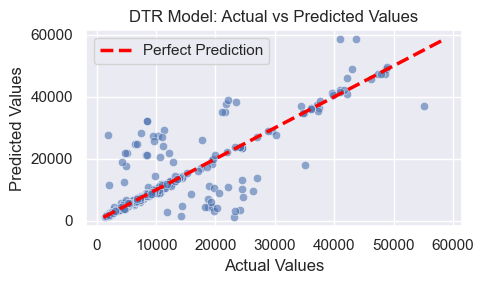

In [358]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred_DTR, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_pred_DTR))
min_val = min(min(y_test), min(y_pred_DTR))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("DTR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Random Forest Regressor Model:

In [360]:
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train, y_train)

y_pred_RFR = RFR_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_RFR)
mae = mean_absolute_error(y_test, y_pred_RFR)
r2 = r2_score(y_test, y_pred_RFR)

print('Random Forest Regressor Performance:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R² Score: {r2:.2f}')

Random Forest Regressor Performance:
Mean Squared Error (MSE): 22102178.56
Mean Absolute Error (MAE): 2623.44
R² Score: 0.84


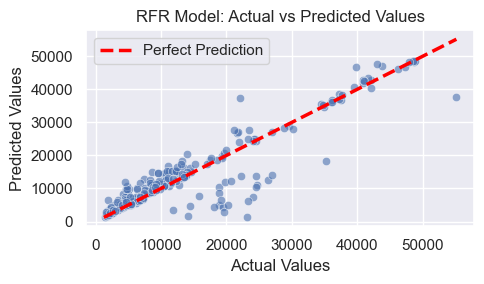

In [361]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred_RFR, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_pred_RFR))
min_val = min(min(y_test), min(y_pred_RFR))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("RFR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Extra Trees Regressor Model:

In [363]:
ETR_model = ExtraTreesRegressor()
ETR_model.fit(X_train, y_train)

y_pred_ETR = ETR_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_ETR)
mae = mean_absolute_error(y_test, y_pred_ETR)
r2 = r2_score(y_test, y_pred_ETR)

print('Extra Trees Regressor Performance:')
print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print(f'R² Score: {r2:.2f}')


Extra Trees Regressor Performance:
Mean Squared Error (MSE):  26166655.27
Mean Absolute Error (MAE):  2854.10
R² Score: 0.81


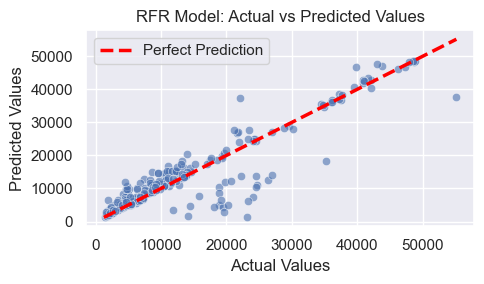

In [364]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred_RFR, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_pred_RFR))
min_val = min(min(y_test), min(y_pred_RFR))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("RFR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. XGBoost Regressor Model:

In [366]:
XGBR_model = XGBRegressor()
XGBR_model.fit(X_train, y_train)

y_pred_XGBR = XGBR_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_XGBR)
mae = mean_absolute_error(y_test, y_pred_XGBR)
r2 = r2_score(y_test, y_pred_XGBR)


print('Gradient Boosting Regressor Performance:')
print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print(f'R² Score: {r2:.2f}')

Gradient Boosting Regressor Performance:
Mean Squared Error (MSE):  25281259.94
Mean Absolute Error (MAE):  2935.93
R² Score: 0.81


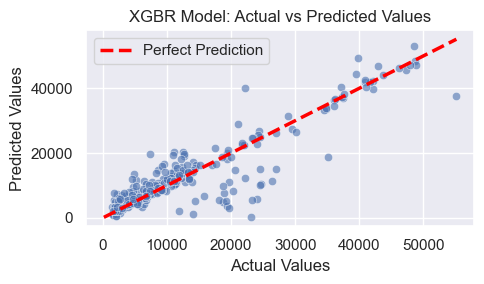

In [367]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred_XGBR, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_pred_XGBR))
min_val = min(min(y_test), min(y_pred_XGBR))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Gradient Boosting Regressor Model:

In [369]:
GBR_model = GradientBoostingRegressor()
GBR_model.fit(X_train, y_train)

y_pred_GBR = GBR_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_GBR)
mae = mean_absolute_error(y_test, y_pred_GBR)
r2 = r2_score(y_test, y_pred_GBR)


print('Gradient Boosting Regressor Performance:')
print(f'Mean Squared Error (MSE): {mse: .2f}')
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print(f'R² Score: {r2:.2f}')

Gradient Boosting Regressor Performance:
Mean Squared Error (MSE):  20506767.96
Mean Absolute Error (MAE):  2593.84
R² Score: 0.85


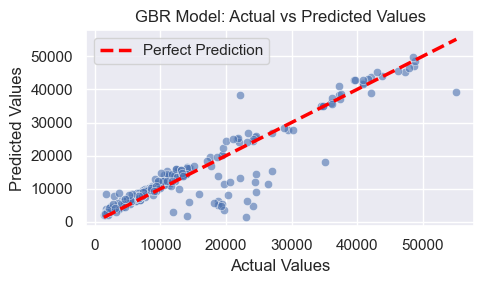

In [370]:
# visualize

plt.figure(figsize=(5, 3))
sns.scatterplot(x=y_test, y=y_pred_GBR, alpha=0.6)

# Plot the 45-degree line for perfect predictions
max_val = max(max(y_test), max(y_pred_GBR))
min_val = min(min(y_test), min(y_pred_GBR))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("GBR Model: Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

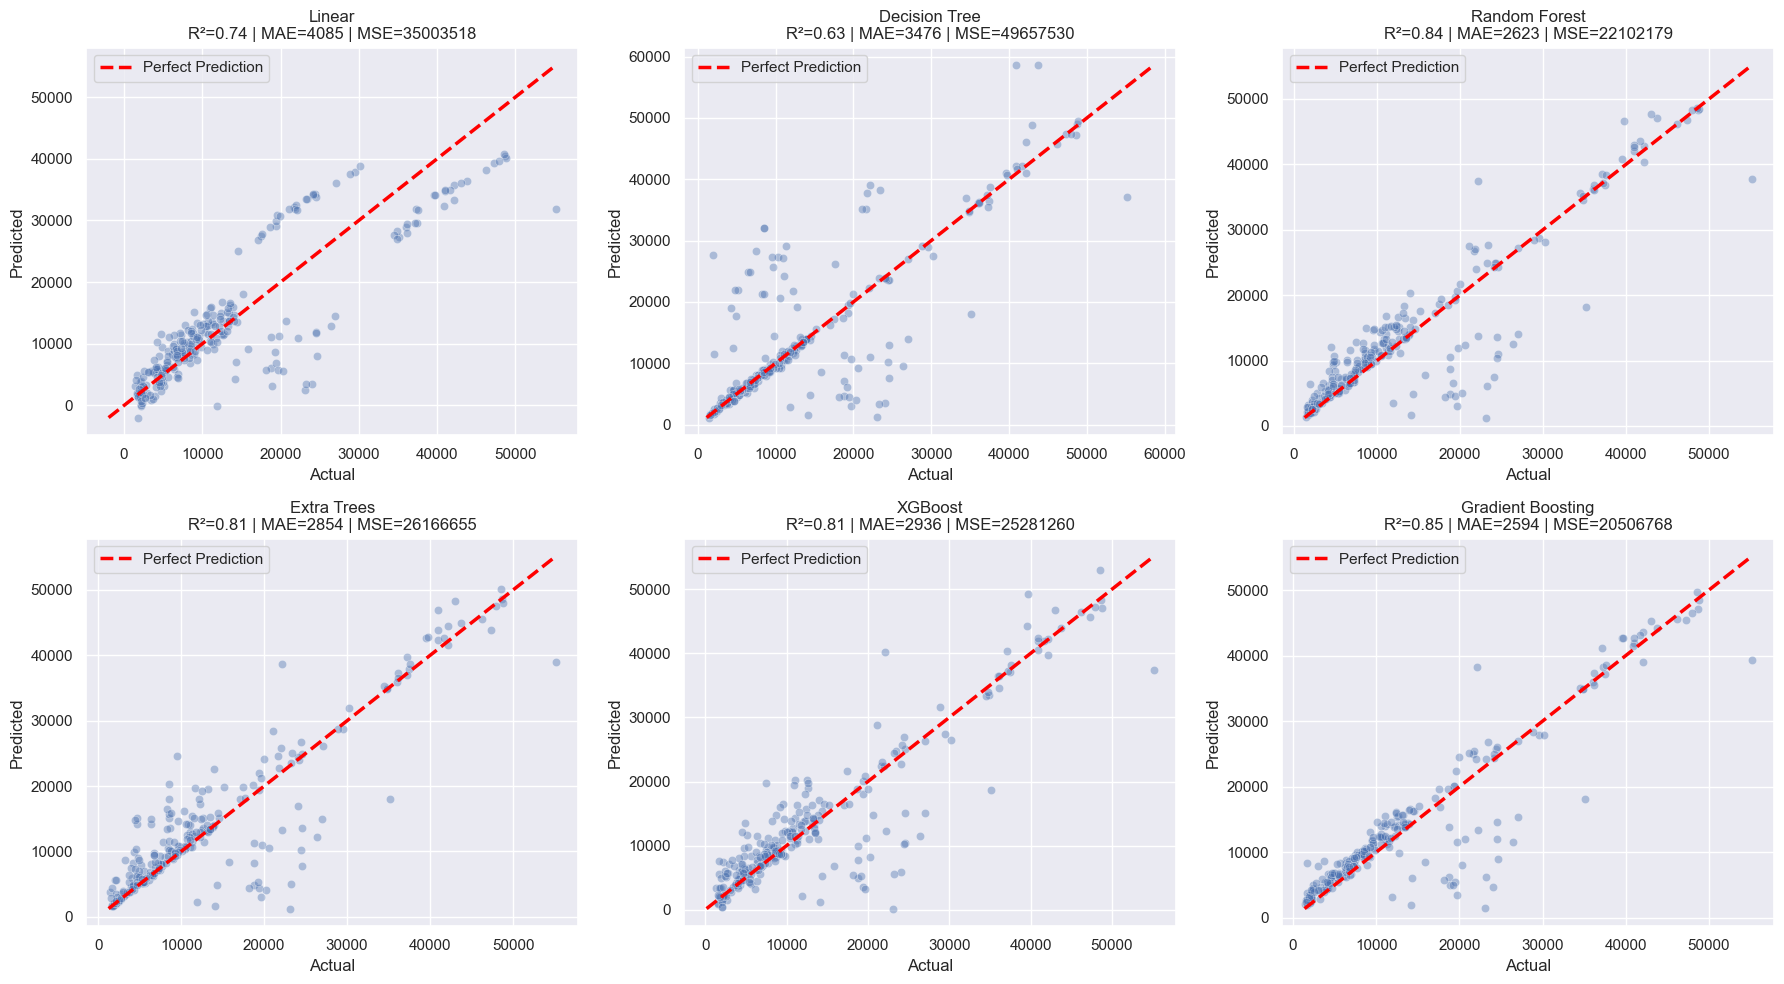

In [371]:
pred_list_model = [y_pred_LR, y_pred_DTR, y_pred_RFR, y_pred_ETR, y_pred_XGBR, y_pred_GBR]
model_names = ['Linear', 'Decision Tree', 'Random Forest', 'Extra Trees', 'XGBoost', 'Gradient Boosting']


plt.figure(figsize=(18, 10))  # Increased height for clarity

for idx, (y_pred, name) in enumerate(zip(pred_list_model, model_names)):
    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Create subplot
    plt.subplot(2, 3, idx + 1)  # 2 rows, 3 columns
    sns.scatterplot(x=y_test, y=y_pred, alpha = 0.4)
    
    # Plot the 45-degree line for perfect predictions
    max_val = max(max(y_test), max(y_pred))
    min_val = min(min(y_test), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

    # Labels and metrics in title
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}\nR²={r2:.2f} | MAE={mae:.0f} | MSE={mse:.0f}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()    
plt.show()

The **Best Model** for **predicting Insurance Claim Amount** out of all with respect to performance (R², MAE, MSE) is **Gradient Boosting**